In [1]:
# check scikit-learn version
import sklearn
from sklearn.tree import export_graphviz
print(sklearn.__version__)

0.22.1


>10 0.859 (0.036)
>60_75 0.841 (0.027)
>60_80 0.833 (0.031)
>60_85 0.829 (0.033)
>60_90 0.833 (0.031)
>60_95 0.838 (0.029)
>60_100 0.839 (0.034)
>60_105 0.837 (0.030)
>60_110 0.854 (0.032)
>60_125 0.860 (0.033)
>60_130 0.871 (0.029)
>100_215 0.905 (0.026)


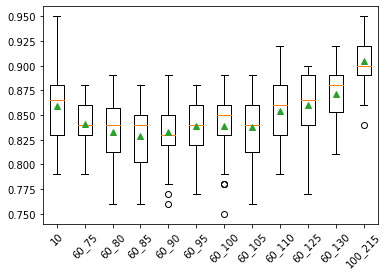

In [2]:
"""by: Peter Mankowski
May 29, 2020
UCLA Campus, Los Angeles California"""

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset generated-bacic set-up
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
    return X, y

# The easiest way to evaluate multidude of models is the 'Dictionary Method'
def get_models():
    models = dict() # Empty dictionary call
    models['10'] = RandomForestClassifier(max_samples=0.1)
    models['60_75'] = RandomForestClassifier(max_samples=0.2, max_features=2, n_estimators=100, max_depth=3, verbose=2)
    models['60_80'] = RandomForestClassifier(max_samples=0.2, max_features=2, n_estimators=100, max_depth=3, verbose=2)
    models['60_85'] = RandomForestClassifier(max_samples=0.2, max_features=3, n_estimators=100, max_depth=3, verbose=2)
    models['60_90'] = RandomForestClassifier(max_samples=0.2, max_features=3, n_estimators=100, max_depth=3, verbose=2)
    models['60_95'] = RandomForestClassifier(max_samples=0.2, max_features=4, n_estimators=100, max_depth=3, verbose=2)
    models['60_100'] = RandomForestClassifier(max_samples=0.2, max_features=4, n_estimators=200, max_depth=3, verbose=2)
    models['60_105'] = RandomForestClassifier(max_samples=0.2, max_features=5, n_estimators=100, max_depth=3, verbose=2)
    models['60_110'] = RandomForestClassifier(max_samples=0.2, max_features=5, n_estimators=200, max_depth=4, verbose=2)
    models['60_125'] = RandomForestClassifier(max_samples=0.2, max_features=6, n_estimators=100, max_depth=5, verbose=2)
    models['60_130'] = RandomForestClassifier(max_samples=0.2, max_features=6, n_estimators=200, max_depth=6, verbose=2)
    models['100_215'] = RandomForestClassifier(max_samples=None)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()